# Exploratory Data Analysis - Inferential Statistics

In [1]:
#load the standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats



Bad key "text.kerning_factor" on line 4 in
/Users/prashantsingh/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#load the dataset
df1=pd.read_csv("./Stats.csv")
df1.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     48895 non-null  object 
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

# ttest for mean of prices (Manhattan and Brooklyn)

Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [4]:
#H0 : the null hypothesis in this dataset where, mean(Manhattan) = mean(Brooklyn) significantly similar.
#H1 : the alternative hypothesis in this dataset where, mean(Manhattan) != mean(Brooklyn) significantly different.

In [5]:
price_M=df1[df1["neighbourhood_group"]=='Manhattan']['price']
price_B=df1[df1["neighbourhood_group"]=='Brooklyn']['price']

In [6]:
#Apply the Welch’s t-test, equal_var=False
ttest_price_M_B=stats.ttest_ind(price_M,price_B,equal_var=False)

In [7]:
ttest_price_M_B

Ttest_indResult(statistic=30.47971595131257, pvalue=1.4649940716903273e-201)

If we consider the significance level to be at 5%, then to accept the null hypothesis, our p-value should be more than the chosen significance level.As per above test our p_value is Zero less than the significance value 5%, then reject null hypothesis(H0). The ttest indicates that our mean price of Manhattan and Brooklyn are different.

# ztest for mean of prices (Queens and Staten Island)

In [8]:
#load the ztest standard library
from statsmodels.stats.weightstats import ztest

In [9]:
#H0 : the null hypothesis in this dataset where, mean(Queens) = mean(Staten Island) significantly similar.
#H1 : the alternative hypothesis in this dataset where, mean(Queens) != mean(Staten Island) significantly different.

In [10]:
price_Q=df1[df1["neighbourhood_group"]=='Queens']['price']
price_S=df1[df1["neighbourhood_group"]=='Staten Island']['price']

In [11]:
ztest(price_Q,price_S)

(-1.6263277131878213, 0.10387995935490578)

If we consider the significance level to be at 5%, then to accept the null hypothesis, our p-value should be more than the chosen significance level.As per above ztest our p_value=10 more than the significance value 5%, then accept null hypothesis(H0). The ztest indicates that our mean price of Queens and Staten Island are not statistically significantly different from each other

# ztest for mean of prices (Private room and Shared room)

In [12]:
#H0 : the null hypothesis in this dataset where, mean(Private) = mean(Shared room) significantly similar.
#H1 : the alternative hypothesis in this dataset where, mean(Private) = mean(Shared room) significantly different.

In [13]:
price_P=df1[df1["room_type"]=='Private room']['price']
price_S=df1[df1["room_type"]=='Shared room']['price']

In [14]:
ztest(price_P,price_S)

(4.135067397312019, 3.5485047812077116e-05)

If we consider the significance level to be at 5%, then to accept the null hypothesis, our p-value should be more than the chosen significance level.As per above ztest our p_value=0 less than the significance value 5%, then reject null hypothesis(H0). The ztest indicates that our mean price of Private and Shared room are significantly different.

# Corrolation Coefficients between reviews and price

References: https://realpython.com/numpy-scipy-pandas-correlation-python/#pearson-correlation-coefficient

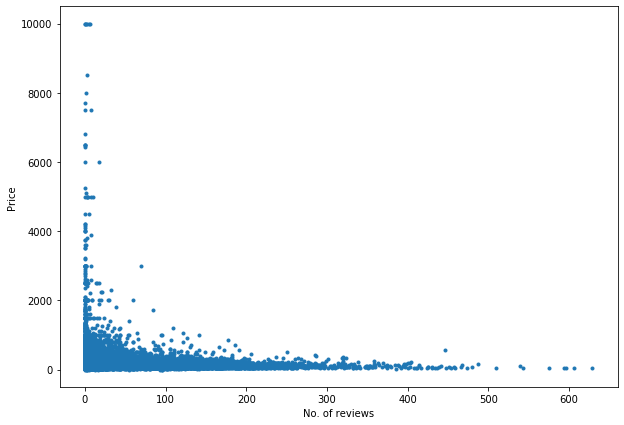

In [15]:
#initializing the figure size
plt.figure(figsize=(10,7))
#Make the scatter plot
plt.plot(df1["number_of_reviews"],df1['price'],marker='.',linestyle='none')
#label the x -axis and y-axis
plt.ylabel("Price")
plt.xlabel("No. of reviews")
#show the result
plt.show()

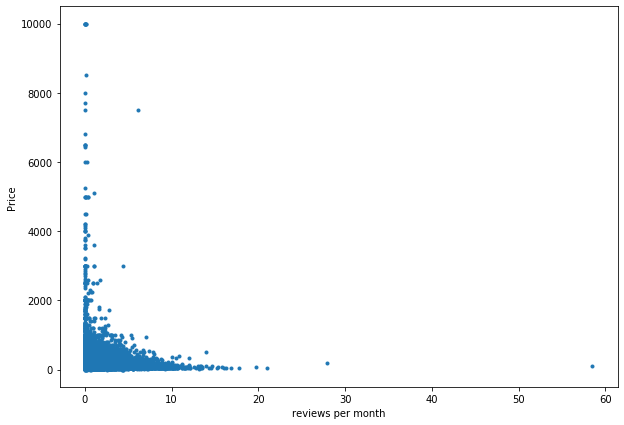

In [16]:
#initializing the figure size
plt.figure(figsize=(10,7))
#Make the scatter plot
plt.plot(df1["reviews_per_month"],df1['price'],marker='.',linestyle='none')
#label the x -axis and y-axis
plt.ylabel("Price")
plt.xlabel("reviews per month")
#show the result
plt.show()

In [17]:
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
r=pearson_r(df1['number_of_reviews'],df1['price'])
print(r)

-0.04795422658266219


In [18]:
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
r=pearson_r(df1['reviews_per_month'],df1['price'])
print(r)

-0.05056409232837771


We can see that there is no corrolation between the two variables

# HeatMap
#### https://seaborn.pydata.org/generated/seaborn.heatmap.html

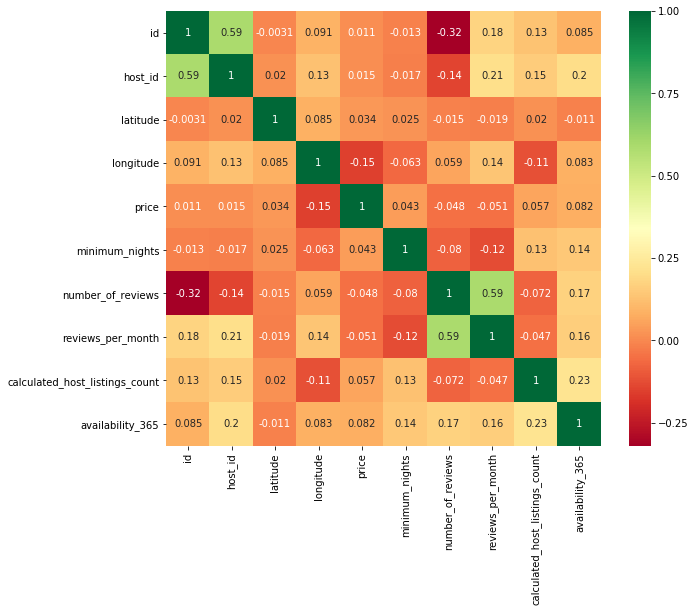

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), square=True, cmap='RdYlGn',annot = True)

host_id and id , number_of_reviews and reviews_per_month have strong correlation. Price and number_of_reviews have less correlation.